In [1]:
!pip install langchain
!pip install langchain_openai
!pip install langgraph
!pip install python-dotenv

  Using cached langchain_text_splitters-0.3.7-py3-none-any.whl.metadata (1.9 kB)
  Using cached greenlet-3.1.1-cp311-cp311-win_amd64.whl.metadata (3.9 kB)
   ---------------------------------------- 0.0/1.0 MB ? eta -:--:--
   ------ --------------------------------- 0.2/1.0 MB 3.1 MB/s eta 0:00:01
   ----------- ---------------------------- 0.3/1.0 MB 3.6 MB/s eta 0:00:01
   ------------------- -------------------- 0.5/1.0 MB 3.4 MB/s eta 0:00:01
   ------------------------- -------------- 0.6/1.0 MB 3.4 MB/s eta 0:00:01
   ----------------------------------- ---- 0.9/1.0 MB 3.7 MB/s eta 0:00:01
   ---------------------------------------- 1.0/1.0 MB 3.8 MB/s eta 0:00:00
   ---------------------------------------- 0.0/420.1 kB ? eta -:--:--
   -------------------------- ------------- 276.5/420.1 kB 5.7 MB/s eta 0:00:01
   ---------------------------------------- 420.1/420.1 kB 5.3 MB/s eta 0:00:00
Using cached langchain_text_splitters-0.3.7-py3-none-any.whl (32 kB)
   -----------------


[notice] A new release of pip is available: 23.3.2 -> 25.0.1
[notice] To update, run: C:\Users\JuanLuisGarciaMendoz\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


  Using cached distro-1.9.0-py3-none-any.whl.metadata (6.8 kB)
  Using cached jiter-0.9.0-cp311-cp311-win_amd64.whl.metadata (5.3 kB)
   ---------------------------------------- 0.0/60.1 kB ? eta -:--:--
   ------ --------------------------------- 10.2/60.1 kB ? eta -:--:--
   ---------------------------------- ----- 51.2/60.1 kB 525.1 kB/s eta 0:00:01
   ---------------------------------------- 60.1/60.1 kB 530.9 kB/s eta 0:00:00
   ---------------------------------------- 0.0/599.1 kB ? eta -:--:--
   ---------------------------------------- 0.0/599.1 kB ? eta -:--:--
   -- ------------------------------------- 41.0/599.1 kB ? eta -:--:--
   ----- ---------------------------------- 81.9/599.1 kB 1.5 MB/s eta 0:00:01
   ------- -------------------------------- 112.6/599.1 kB 1.1 MB/s eta 0:00:01
   -------- ------------------------------- 122.9/599.1 kB 1.0 MB/s eta 0:00:01
   -------- ------------------------------- 122.9/599.1 kB 1.0 MB/s eta 0:00:01
   -------- --------------------


[notice] A new release of pip is available: 23.3.2 -> 25.0.1
[notice] To update, run: C:\Users\JuanLuisGarciaMendoz\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


     ---------------------------------------- 0.0/44.4 kB ? eta -:--:--
     ---------------------------------------- 44.4/44.4 kB 1.1 MB/s eta 0:00:00
   ---------------------------------------- 0.0/138.0 kB ? eta -:--:--
   ----------------- ---------------------- 61.4/138.0 kB 1.1 MB/s eta 0:00:01
   ----------------------- --------------- 81.9/138.0 kB 919.0 kB/s eta 0:00:01
   -------------------------- ------------ 92.2/138.0 kB 751.6 kB/s eta 0:00:01
   -------------------------------------- 138.0/138.0 kB 743.0 kB/s eta 0:00:00
   ---------------------------------------- 0.0/41.9 kB ? eta -:--:--
   ---------------------------------------  41.0/41.9 kB 1.9 MB/s eta 0:00:01
   ---------------------------------------- 41.9/41.9 kB 1.0 MB/s eta 0:00:00
   ---------------------------------------- 0.0/47.1 kB ? eta -:--:--
   ---------------------------------- ----- 41.0/47.1 kB 1.9 MB/s eta 0:00:01
   ---------------------------------------- 47.1/47.1 kB 1.2 MB/s eta 0:00:00
   ---


[notice] A new release of pip is available: 23.3.2 -> 25.0.1
[notice] To update, run: C:\Users\JuanLuisGarciaMendoz\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.3.2 -> 25.0.1
[notice] To update, run: C:\Users\JuanLuisGarciaMendoz\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [2]:
from typing import List
from enum import Enum
from pydantic import BaseModel,Field
from langgraph.graph import END, StateGraph, START
from langchain_openai import ChatOpenAI
from langchain_core.prompts import PromptTemplate
from langchain_core.prompts.chat import (
    ChatPromptTemplate,
    HumanMessagePromptTemplate
)

C:\Users\JuanLuisGarciaMendoz\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\requests\__init__.py:86: RequestsDependencyWarning: Unable to find acceptable character detection dependency (chardet or charset_normalizer).
  warnings.warn(


### Structures used to organize and validate data within the workflow.

In [3]:
class ReviewerFeedback(BaseModel):
    result: str = Field(
        description="'yes' if the text meets the conditions or 'no' otherwise"
    )
    explanation: str = Field(
        description="Explanation of whether the text meets the conditions or 'not'"
    )
class Edition(BaseModel):
    text: str = Field(description="Edited Text")
    explanation: str = Field(
        description="Explanation of the changes introduced in the edited text."
    )


In [4]:
class AgentType(str, Enum):
    REVIEWER = "REVIEWER"
    POST_EDITOR = "EDITOR"
    CONCILIATOR = "CONCILIATOR"

class AgentResult(BaseModel):
    result: str
    explanation: str
    agent_type: AgentType

class WorkflowState(BaseModel):
    text: str
    edited_text:str
    history: List[AgentResult] = []
    iterations: int = 0
    max_iterations: int = 3

### Prompts

In [5]:
REVIEWER_PROMPT="""You are an expert reviewer. Your task is to evaluate the \
following text based on clarity, coherence, and correctness.

### Task Instructions:
- Assign a Binary Score:
    - "yes" if the text meets all conditions.
    - "no" otherwise.
- Provide constructive feedback and suggest improvements.
- If the text is already perfect, say 'No changes needed'
- Consider the Complete History:
    - Review the complete history provided below.
    - Understand the evolution and reasoning behind each change.
    - Pay close attention to recurring issues and how they have been addressed.
    - If you disagree with any of the decisions made, provide a clear explanation of your concerns.

**Text**:
{text}

**History:**
{history}
"""

In [6]:
EDITOR_PROMPT="""You are an expert editor. Based on the reviewer's \
feedback, refine the original text accordingly. Ensure that all suggested \
improvements are implemented while maintaining the original intent.

### Task Instructions:
- Consider the reviewer's feedback:
    - The information provided in History is a detailed history of previous iterations of edition.
    - Each iteration includes the edited text along with feedback from either the reviewer or the editor.
    - Use this history to understand the evolution of the edition and to avoid repeating past errors.
    - Pay special attention to recurring issues identified by the reviewer.
- Edit the Text to align with the reviewer's feedback.
- Provide an explanation of the changes made.

**Text**:
{text}

**History:**
{history}
"""

In [7]:
CONCILIATOR_PROMPT="""You are an expert Conciliator, tasked with resolving \
discrepancies between an Editor and a Reviewer in an editing workflow. \
Your goal is to analyze their interaction history and provide a definitive \
resolution that ensures the final text is clear, coherent, and correct.

### Task Instructions:
- Analyze the provided history and identify the key points of disagreement.
- Provide a definitive resolution for each disputed segment.
- Justify your decisions with clear and detailed explanations.
- Ensure that the final text maintains clarity, coherence, and correctness.
- Provide a summary of the reasoning in the ``explanation`` key.

**Original Text**:
{text}

**History:**
{history}
"""

### Nodes

In [24]:
from dotenv import load_dotenv
import os

load_dotenv()

api_key = os.getenv("OPEN_AI_API_KEY")

llm = ChatOpenAI(model="gpt-4o-mini", temperature=0.7, openai_api_key=api_key)

In [38]:
def history_to_str(history: List[AgentResult]) -> str:
    result = ""
    for r in history:
        if r.agent_type == AgentType.CONCILIATOR:
            continue
        tmp = f"Text: {r.result}" if r.agent_type in [AgentType.POST_EDITOR,AgentType.CONCILIATOR]  else f"Decision: {r.result}"
        result += f"- {r.agent_type.value}\n\t* {tmp}\n\t* Suggestions: {r.explanation}\n\n"
    return result

#### Reviewer

In [32]:
def node_reviewer(state: WorkflowState):
    state.iterations += 1
    human = HumanMessagePromptTemplate(prompt=PromptTemplate(template=REVIEWER_PROMPT))
    template = ChatPromptTemplate.from_messages([human])
    chain = template | llm.with_structured_output(ReviewerFeedback)
    response = chain.invoke(
        {
            "text": state.edited_text,
            "history": history_to_str(state.history),
        }
    )
    state.history.append(
        AgentResult(
            result=response.result,
            explanation=response.explanation,
            agent_type=AgentType.REVIEWER,
        )
    )
    return state

#### Editor

In [33]:
def node_editor(state: WorkflowState):
    human = HumanMessagePromptTemplate(prompt=PromptTemplate(template=EDITOR_PROMPT))
    template = ChatPromptTemplate.from_messages([human])
    chain = template | llm.with_structured_output(Edition)
    response = chain.invoke(
        {
            "text": state.edited_text,
            "history": history_to_str(state.history),
        }
    )
    state.edited_text = response.text
    state.history.append(
        AgentResult(
            result=response.text,
            explanation=response.explanation,
            agent_type=AgentType.POST_EDITOR,
        )
    )
    return state

#### Conciliator

In [34]:
def node_conciliator(state: WorkflowState):
    human = HumanMessagePromptTemplate(prompt=PromptTemplate(template=CONCILIATOR_PROMPT))
    template = ChatPromptTemplate.from_messages([human])
    chain = template | llm.with_structured_output(Edition)
    response = chain.invoke(
        {
            "text": state.text,
            "history": history_to_str(state.history),
        }
    )
    state.edited_text = response.text
    state.history.append(
        AgentResult(
            result=response.text,
            explanation=response.explanation,
            agent_type=AgentType.CONCILIATOR,
        )
    )
    return state

### Define Graph

In [35]:
workflow = StateGraph(WorkflowState)

workflow.add_node("reviewer", node_reviewer)
workflow.add_node("editor", node_editor)
workflow.add_node("conciliator", node_conciliator)


workflow.add_edge(START, "reviewer")
workflow.add_conditional_edges(
  "reviewer",
  lambda state: "conciliator" if state.iterations >= state.max_iterations else END if state.history[-1].result == "yes" else "editor"
)
workflow.add_edge("editor", "reviewer")
workflow.add_edge("conciliator", END)

graph = workflow.compile()

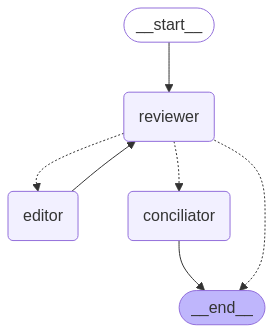

In [36]:
from IPython.display import Image, display
from langchain_core.runnables.graph import CurveStyle, MermaidDrawMethod, NodeStyles

display(
    Image(
        graph.get_graph().draw_mermaid_png(
            draw_method=MermaidDrawMethod.API,
        )
    )
)

In [39]:
text = "The quick brown fox jump over the lazy dog."
initial_state = WorkflowState(text=text,edited_text=text)
final_state = graph.invoke(initial_state)
final_state = WorkflowState(**final_state)
print(final_state.edited_text)
print(history_to_str(final_state.history))

The quick brown fox jumps over the lazy dog.
[AgentResult(result='no', explanation="The sentence contains a grammatical error. It should be 'The quick brown fox jumps over the lazy dog.' to be correct. The verb 'jump' is incorrectly used in the present tense instead of 'jumps'. Additionally, while the sentence is coherent and clear, the grammatical mistake undermines its correctness. To improve, correct the verb form.", agent_type=<AgentType.REVIEWER: 'REVIEWER'>), AgentResult(result='The quick brown fox jumps over the lazy dog.', explanation="The verb 'jump' was corrected to 'jumps' to fix the grammatical error identified by the reviewer. This change ensures that the sentence is in the correct present tense, maintaining clarity and coherence.", agent_type=<AgentType.POST_EDITOR: 'EDITOR'>), AgentResult(result='yes', explanation="The text is clear, coherent, and correct. It is a well-known pangram that effectively demonstrates the use of all letters in the English alphabet. The previou